<a href="https://colab.research.google.com/github/JulieaMammen/Seattle-Weather/blob/main/JulieMammen_DATA_3320_Seattle_St_Louis_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

The purpose of this assignment is to clean up the SEA and STL data in order to prepare it for analysis to answer the question. 

## Introduction

The purpose of this notebook is to be able to produce a joined data frame of the Seattle and St. Louis data sets and prepare it for analysis to answer the question of whether it rains more in Seattle than in St. Louis.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [2]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

Load the St. Louis data set

In [3]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

In [4]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


## Explore the contents of the data sets

**Let's examine the contents of the Seattle data set**

In [5]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


**Let's examine the contents of the St. Louis data set**

In [6]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


In [7]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


By examining the data frames for both Seattle and St. Louis, we can see that overall the data sets have very similar contents with the only exception being a few differing columns. With the Seattle data set having the additional columns 'WESD' and 'WESF'. Furthermore, with more close analysis we can see that the St. Louis data set contains data also from 2017, which is not needed for the analysis of this data.

When examining the two data sets, it can be seen the varying sizes of the two data sets. With the Seattle data only having 1658 observations and the St. Louis data having 54571 observations. 

In [8]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


We can examine the St. Louis data set to see the potential reason as to why the data set is much bigger. Two assumptions could be through the additional year, 2017, or that the St. Louis data set contains more locations that it is tracking the precipitation for. However, the addition year should at most add on only 356 observations, which does not line up with the 54,574 observations. Therefore, we can look for additional locations tracked in St. Louis by filtering the 'Station' column to determine if there is more than one station being recorded.

In [9]:
df_stlouis['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

By utilizing the .unique() function we can easily see that there are multiple locations that are being tracked within the St. Louis data set, which can explain the inflated observation count in comparsion to the Seattle data set. We can further reinforce this observation by using the value_counts() function to further dissect both data sets to illustrate the entries in comparison to the station locations.

In [10]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [11]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

Through these code snippets it can be more easily seen why the St. Louis data set is much larger than the Seattle data set. There are much more locations that are tracked in the St. Louis data set, so in order to make a more concise and reasonable comparison we would need to track only one station in the St. Louis data set to compare with the Seattle data. 

## Convert data types

When looking at the dataframes, it can be seen that the dates column is stored as a string instead. Therefore, we will need to convert it to datetime. The importance of this is to ensure that the data is properly stored and organized to more easily see if there are potential gaps in dates. However, if the dates are to remain as strings, then a plot will simply show them as successive values instead which can potentially hide gaps in the data. 

In [12]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [13]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [14]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [15]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  54574 non-null  object        
 1   NAME     54574 non-null  object        
 2   DATE     54574 non-null  datetime64[ns]
 3   DAPR     1166 non-null   float64       
 4   MDPR     1163 non-null   float64       
 5   PRCP     53143 non-null  float64       
 6   SNOW     33167 non-null  float64       
 7   SNWD     12835 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.3+ MB


Through the the info displayed from both the St. Louis and Seattle data sets, we can more easily observe that the date column is now properly in the datetime type instead of being represented as an object. 

## Select relevant subsets of the data

Now we can examine the data sets to try and construct a more cohesive answer. The first step would be to examine the data sets to see if they are reasonable to compare. As mentioned previously, the St. Louis data set and Seattle data set have more columns than what we really need to examine, so we should select the sets of data that would help for a more reasonable analysis of this data frame.

The most important subsets of the data we would want to analyze would be the 'Station', 'Date', and 'Prcp'. So we will select those columns to keep within the data frame so we can analyze it in the future. 

In [16]:
df_seattle[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


In [17]:
df_stlouis[['STATION', 'DATE', 'PRCP']]

,STATION,DATE,PRCP
0,US1MOSS0027,2017-01-01,0.00
1,US1MOSS0027,2017-01-03,0.35
2,US1MOSS0027,2017-01-04,0.03
3,US1MOSS0027,2017-01-05,0.04
4,US1MOSS0027,2017-01-06,0.00
...,...,...,...
54569,US1MOSL0084,2022-12-08,0.00
54570,US1MOSL0084,2022-12-13,0.00
54571,US1MOSL0084,2022-12-14,0.89
54572,US1MOSL0084,2022-12-15,0.36


We noted before that the St. Louis data set contains entries from 2017, however, we only need to observe data from 2018 on. So let's limit the data set to be from 2018 and on.

In [18]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [19]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


We saw previously that the St. Louis data set was much larger than the Seattle data set. We surmised that this might be due to multiple locations being tracked therefore let's confirm this.

In [20]:
df_stlouis['STATION'].value_counts()

USW00003960    1826
USW00013994    1826
USC00237398    1824
USC00237397    1824
US1MOSLC007    1819
USC00237452    1793
US1ILMD0010    1792
US1MOSL0024    1768
US1MOJF0018    1756
US1MOSL0027    1728
US1MOSL0074    1674
US1ILMD0012    1667
US1MOSL0004    1612
US1MOSL0049    1604
US1MOSL0018    1598
US1MOSL0055    1490
US1MOSL0050    1485
US1MOSS0027    1422
US1MOFSA189    1420
US1MOSL0077    1339
US1MOSL0020    1287
US1MOSL0039    1219
US1MOSL0067    1204
US1MOJF0025    1124
US1ILSC0009    1034
US1MOSL0081     914
US1MOSL0063     804
US1MOSL0083     646
US1MOSL0045     628
US1MOSL0062     621
US1MOSL0070     602
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1ILSC0018     237
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1ILMO0006     162
Name: STATION, dtype: int64

The St. Louis data set has many values for weather stations, while the Seattle data set has only one weather station. Therefore, we will focus on the data from the airport in St. Louis.

In [21]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [22]:
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

In [23]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

Now we have a more concise data set that is more accurate to compare to be able to answer the question of where it rains more. However, we can take note from the results of the value_counts() function, that there still seems to be some disparity between the data sets. Therefore, we should examine and identify whether there are missing values within the data set. 

## Identify and deal with missing values

We can use the .isna().sum() method to see how many null values there are in a given data set. So we'll apply this to the St. Louis and Seattle data set to examine if there are null values. 

In [24]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

In [25]:
df_seattle.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1635
MDPR       1635
PRCP         22
SNOW       1305
SNWD       1592
WESD       1643
WESF       1630
dtype: int64

As seen, there seems to be 22 null values within the seattle data set for the 'PRCP' column, however, we are unable to see explicitly whether we are also missing days from the data set. 

Over 5 years there should be 

$$5 \times 365 + 1 = 1826$$

days. 

The St. Louis data set is not missing any dates or precipitation values. However, the Seattle data set seems to be missing dates as there are only 1658 entries compared to 1826.

In [26]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


## Join data frames keeping `DATE` and `PRCP` columns

We can examine better which dates the Seattle data set is missing by joining the two data sets together. Since the St. Louis has data for all dates, we will do a left join with St. Louis as the left data set.

In [27]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

In [28]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


In [29]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


Now we have the joined dataframe, which differentiates the different cities through PRCP_X and PRCP_Y ase both dataframes had a PRCP column. We will next work on make the data into a tidy format. 

## Create a tidy data frame with columns for city and precipitation

Now we will make the data frame into tidy format and give it more readable column names for city and precipitation.

In [30]:
df

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1821,2022-12-27,0.00,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.31,0.62


In [31]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

In [32]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


As we can see, instead of having columns labeled as PRCP_x and PRCP_y, we have just a CITY and PRCP column that makes it easier to understand the dataframe to be able to perform analysis.

Now we will rename the city values 'STL' and 'SEA'.

In [33]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [34]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [35]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [36]:
df.tail()

,DATE,CITY,PRCP
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


Now we can see that the cities have been correctly renamed from PRCP_x and PRCP_y

Next we will rename the columns to be lowercase and more easily understood using `df.rename()`, and in line with snake_case format to be more readable.

In [37]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

In [38]:
df.head()

,date,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


Now we have the data frame joined together, in tidy format, and with more organized columns to make it easier to understand for when we will perform analysis on it.

Now we need to address the missing values within the data set and be able to adequately fill them in order to not skew the data in favor of one city or another. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


We can use the msno.matrix() method on our dataframe to more easily understand and visual the missing data within the data frame. 

<Axes: >

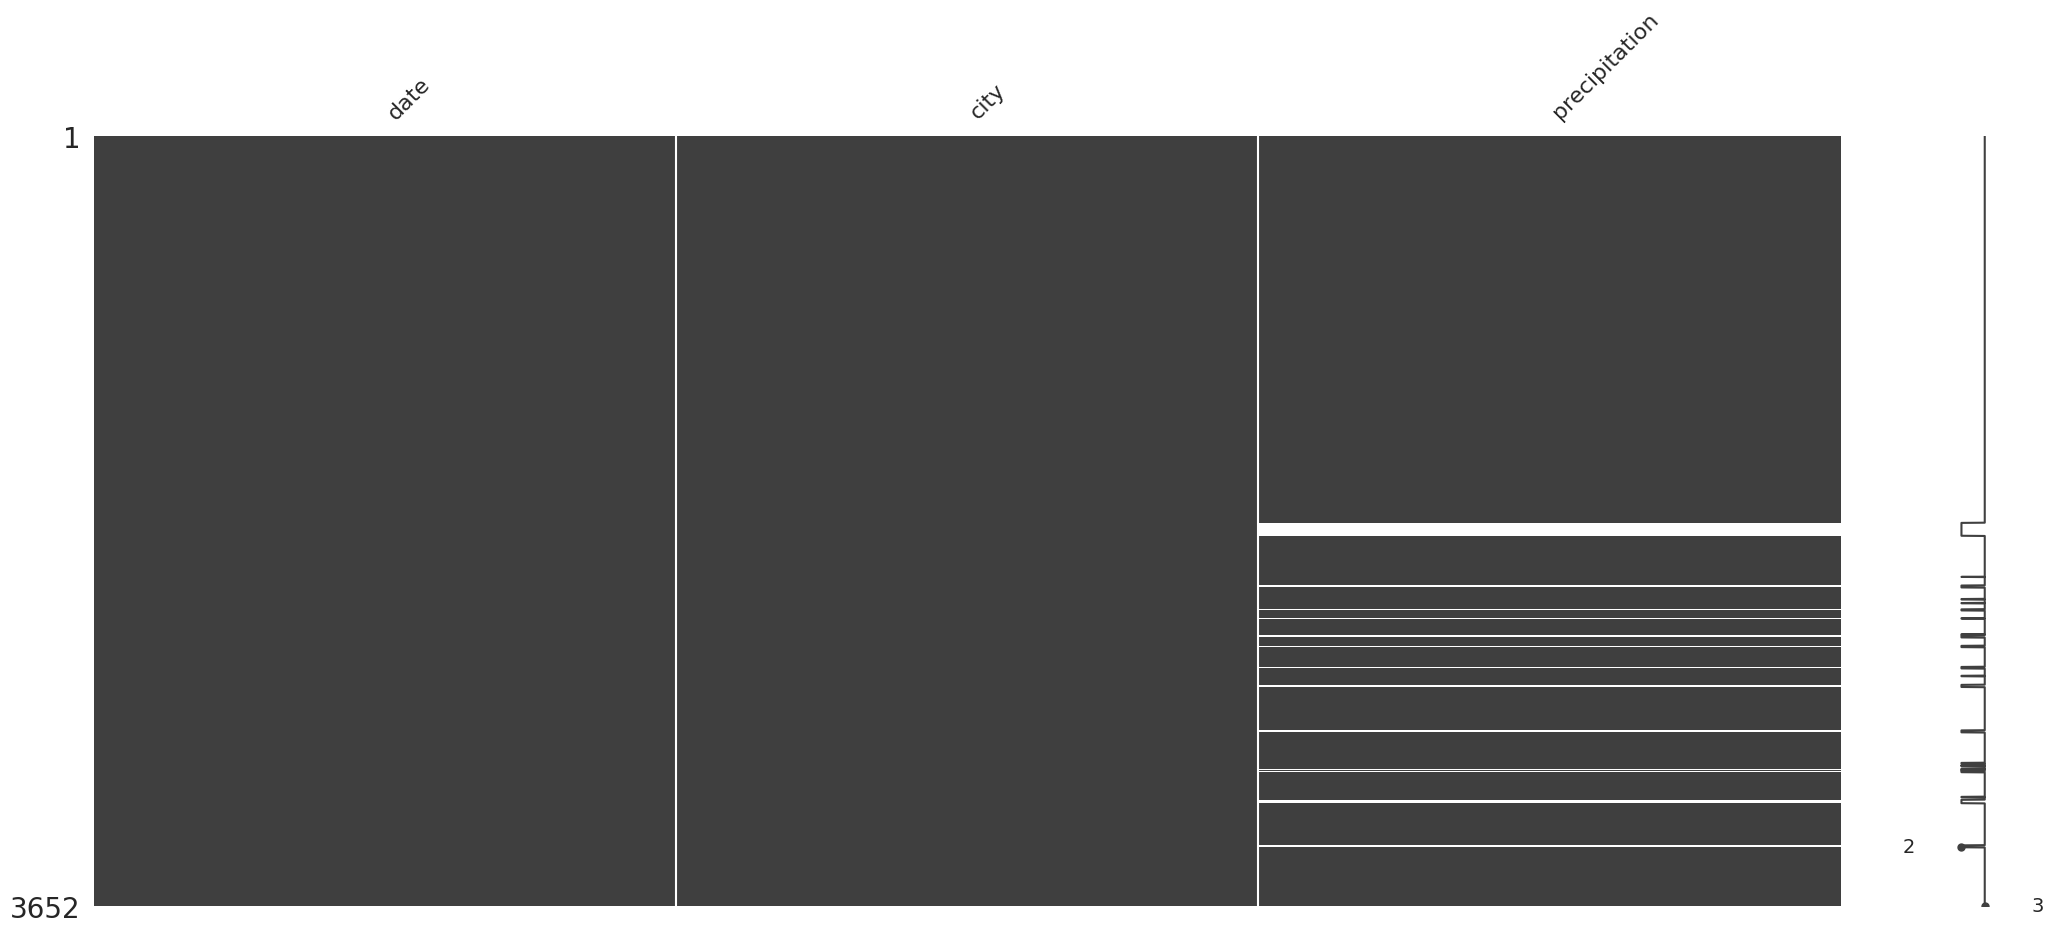

In [40]:
msno.matrix(df)

As the St. Louis data set was not missing any dates, we can more clearly try to see where the data is missing in the Seattle data set. We can see this block of missing values at the beginning of the second half of the precipitation column.

Now we will work on replacing the missing values by imputing them with the mean across the years of values on that day.

First we will define a column in this dataset to give us the day of year corresponding from 1-366.

In [41]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [42]:
df.head(30)

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
5,2018-01-06,STL,0.00,6
6,2018-01-07,STL,0.35,7
7,2018-01-08,STL,0.00,8
8,2018-01-09,STL,0.00,9
9,2018-01-10,STL,0.00,10


Now we can utilize the isna() method to determine what days the Seattle data set was missing days in the entries. 

In [43]:
df[df['precipitation'].isna()]

,date,city,precipitation,day_of_year
1834,2018-01-09,SEA,NaN,9
1835,2018-01-10,SEA,NaN,10
1836,2018-01-11,SEA,NaN,11
1837,2018-01-12,SEA,NaN,12
1838,2018-01-13,SEA,NaN,13
...,...,...,...,...
3368,2022-03-23,SEA,NaN,82
3369,2022-03-24,SEA,NaN,83
3370,2022-03-25,SEA,NaN,84
3371,2022-03-26,SEA,NaN,85


Now we will get the index of each row where precipitation is missing to be able to compute the mean precipitation for each day in Seattle averaged throughout the years.

In [44]:
indices = np.where(df['precipitation'].isna()==True)[0]

In [45]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

In [46]:
df['day_of_year'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [47]:
pd.DatetimeIndex(df.loc[df['date'] == '2019-03-01', 'date']).day_of_year

Int64Index([60, 60], dtype='int64', name='date')

In [48]:
pd.DatetimeIndex(df.loc[df['date'] == '2020-03-01', 'date']).day_of_year

Int64Index([61, 61], dtype='int64', name='date')

In [49]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [50]:
mean_day_precipitation

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


Now for each missing value in the data frame, we will replace it with the mean daily precipitation that we have computed above.

In [51]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

Now we check that there are no missing values within the data frame.



In [52]:
df[df['precipitation'].isna()==True]

,date,city,precipitation,day_of_year


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3652 non-null   float64       
 3   day_of_year    3652 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 114.2+ KB


In [54]:
df

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
...,...,...,...,...
3647,2022-12-27,SEA,0.78,361
3648,2022-12-28,SEA,0.40,362
3649,2022-12-29,SEA,0.03,363
3650,2022-12-30,SEA,0.62,364


Now we can see that we have succesfully imputed the missing values so we can more accurately analyze the data frame and be able to answer the question of whether it rains more in St. Louis or Seattle.

Now we have some methods in which we can analyze the prepared data to create a narrative and visuals to help understand what story the data is conveying. 

- bar graph to compare the STL and SEA prcp vals
- take an avg of prcp to get a vague understanding of which has more prcp
- line graphs to compare the yearly outputs
- compare the avgs of prcp each year against each other? Data from 2018-2022
- pie chart for relative comparison


Here we create new columns called "month" and "year" in order to be able to more easily utilize the data and perform the analytical methods that are suggested above. 

In [55]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

In [56]:
df

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,STL,0.00,1,1,2018
1,2018-01-02,STL,0.00,2,1,2018
2,2018-01-03,STL,0.00,3,1,2018
3,2018-01-04,STL,0.00,4,1,2018
4,2018-01-05,STL,0.00,5,1,2018
...,...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12,2022
3648,2022-12-28,SEA,0.40,362,12,2022
3649,2022-12-29,SEA,0.03,363,12,2022
3650,2022-12-30,SEA,0.62,364,12,2022


From here we can start to analyze the prepared data set, starting wiuth either numerical summaries or creating plots to see what conclusion the data is narrating to us.

## Numerical Summaries

In [57]:
df.describe()

,precipitation,day_of_year,month,year
count,3652.000000,3652.000000,3652.000000,3652.00000
mean,0.121808,183.100219,6.523549,2020.00000
std,0.325431,105.438580,3.449005,1.41402
min,0.000000,1.000000,1.000000,2018.00000
25%,0.000000,92.000000,4.000000,2019.00000
50%,0.000000,183.000000,7.000000,2020.00000
75%,0.100000,274.000000,10.000000,2021.00000
max,8.640000,366.000000,12.000000,2022.00000


In [58]:
df['precipitation'].max()

8.64

In [59]:
df['precipitation'].min()

0.0

In [60]:
df.groupby(by='city').describe()

precipitation                                                  \
             count      mean       std  min  25%   50%   75%   max   
city                                                                 
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60   
STL         1826.0  0.130345  0.392268  0.0  0.0  0.00  0.05  8.64   

     day_of_year              ... month          year                    \
           count        mean  ...   75%   max   count    mean       std   
city                          ...                                         
SEA       1826.0  183.100219  ...  10.0  12.0  1826.0  2020.0  1.414214   
STL       1826.0  183.100219  ...  10.0  12.0  1826.0  2020.0  1.414214   

                                              
         min     25%     50%     75%     max  
city                                          
SEA   2018.0  2019.0  2020.0  2021.0  2022.0  
STL   2018.0  2019.0  2020.0  2021.0  2022.0  

[2 rows x 32 columns]

##Plots

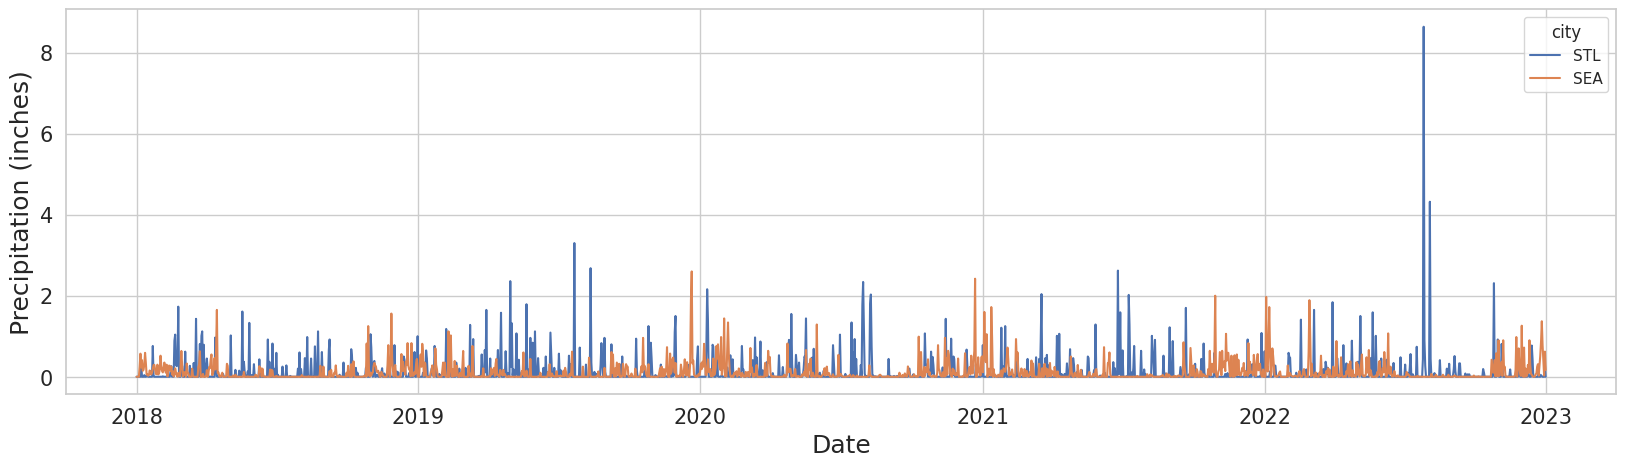

In [61]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df, x = 'date', y = 'precipitation', hue='city')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize=15);

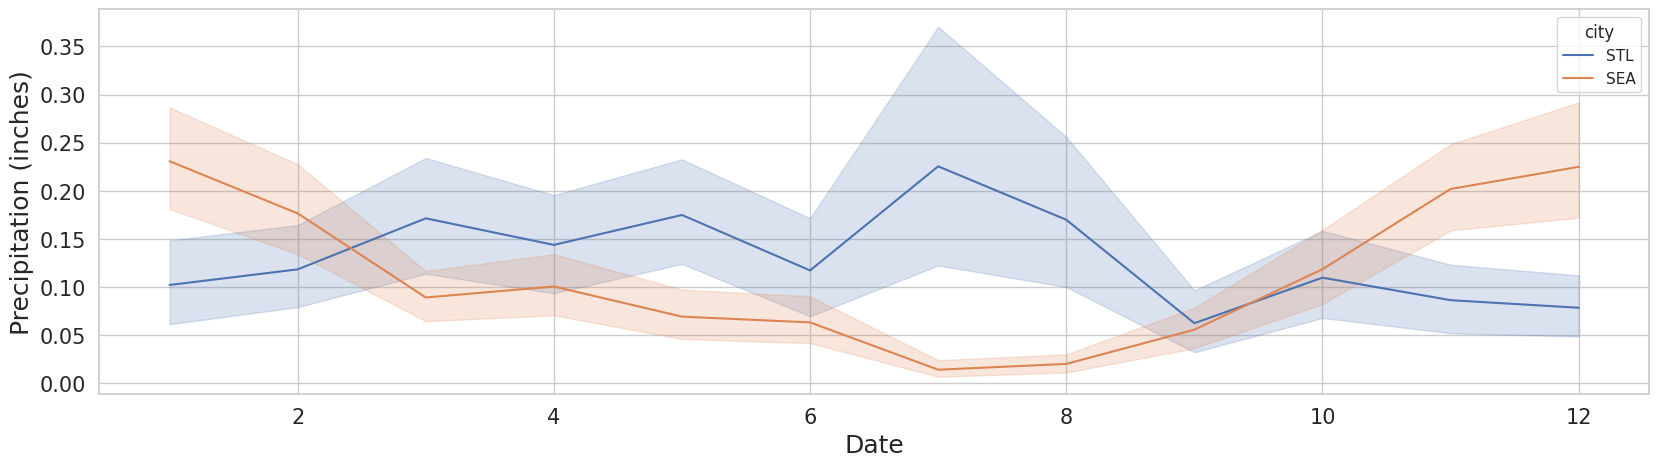

In [62]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df, x = 'month', y = 'precipitation', hue='city')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)

#plt.xticks() - look into!

plt.tick_params(labelsize=15);

([<matplotlib.axis.XTick at 0x7f6094862cd0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sept'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

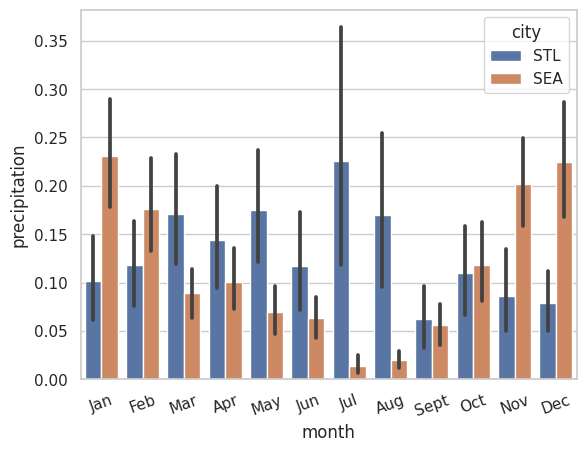

In [63]:
sns.barplot(data=df, x='month', y='precipitation', hue='city')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=['Jan', "Feb", 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=20)

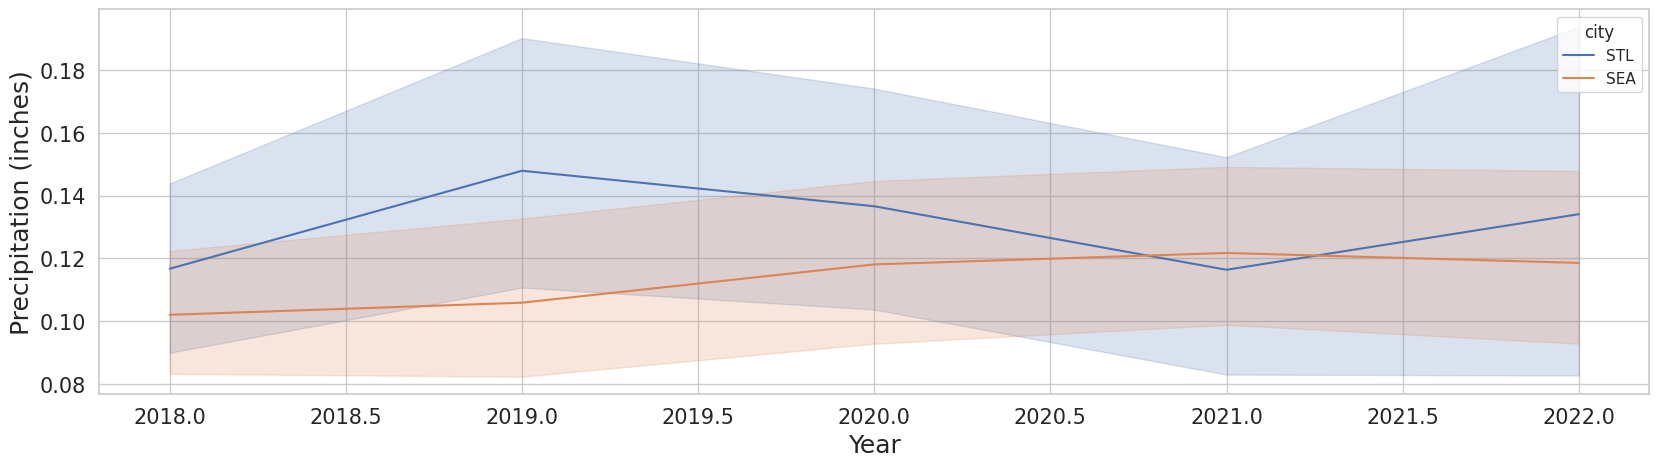

In [64]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df, x = 'year', y = 'precipitation', hue='city')

plt.xlabel('Year', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)

plt.tick_params(labelsize=15);

<Axes: xlabel='year', ylabel='precipitation'>

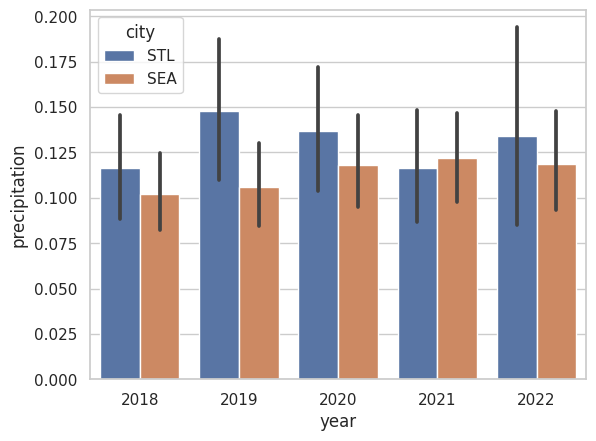

In [65]:
sns.barplot(data=df, x='year', y='precipitation', hue='city')

In [66]:
df_no_rain = df.loc[df['precipitation'] == 0]
df_no_rain

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,STL,0.0,1,1,2018
1,2018-01-02,STL,0.0,2,1,2018
2,2018-01-03,STL,0.0,3,1,2018
3,2018-01-04,STL,0.0,4,1,2018
4,2018-01-05,STL,0.0,5,1,2018
...,...,...,...,...,...,...
3614,2022-11-24,SEA,0.0,328,11,2022
3622,2022-12-02,SEA,0.0,336,12,2022
3624,2022-12-04,SEA,0.0,338,12,2022
3635,2022-12-15,SEA,0.0,349,12,2022


<Axes: xlabel='date,city,precipitation,day_of_year,month,year'>

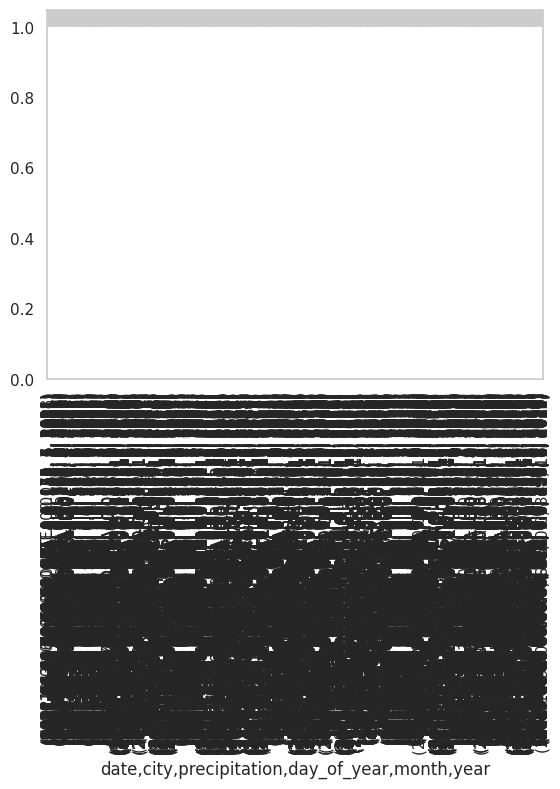

In [67]:
df_no_rain.value_counts().plot(kind='bar')

### Notes

end class 3 

## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. It is fine to return to modify this step after exploring the data further.

## Export the clean .csv file

In [69]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>